<a href="https://colab.research.google.com/github/sahug/ds-tensorflow-colab/blob/master/Tensorflow%20-%20IMDB%20Sentiments%20Classification%20Using%20RNN-LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tensorflow - IMDB Sentiments Classification Using RNN-LSTM**

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
print(tf.__version__)

2.8.0


**Data Preprocessing**

In [34]:
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=20000)

In [35]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [36]:
# padding any reviews which has more that 100 length
X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)

In [37]:
X_train.shape

(25000, 100)

In [38]:
voacab_size = 20000
embed_size = 128

**Build LSTM**

In [39]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding, Activation # Embedding is advance version of converting words to vectors

In [40]:
model = Sequential()
model.add(Embedding(voacab_size, embed_size, input_shape=(X_train.shape[1],)))
model.add(LSTM(units=60, activation="tanh"))
model.add(Dense(units=1, activation="sigmoid"))

In [41]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 128)          2560000   
                                                                 
 lstm_3 (LSTM)               (None, 60)                45360     
                                                                 
 dense_3 (Dense)             (None, 1)                 61        
                                                                 
Total params: 2,605,421
Trainable params: 2,605,421
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [46]:
history = model.fit(X_train, Y_train, epochs=5, batch_size=128, validation_data=(X_test, Y_test), verbose=10)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5


In [47]:
history.history

{'accuracy': [0.9800400137901306,
  0.9856399893760681,
  0.9866799712181091,
  0.9905200004577637,
  0.9897599816322327],
 'loss': [0.05878861993551254,
  0.0446852408349514,
  0.04191270098090172,
  0.031551048159599304,
  0.03306010365486145],
 'val_accuracy': [0.8307999968528748,
  0.8259199857711792,
  0.827239990234375,
  0.8241199851036072,
  0.823639988899231],
 'val_loss': [0.5647383332252502,
  0.742387056350708,
  0.7392882108688354,
  0.688418984413147,
  0.8316082954406738]}

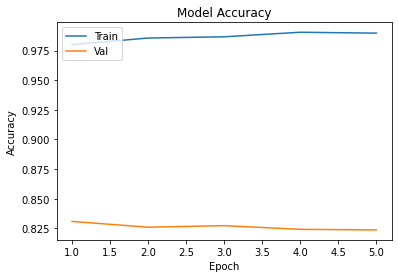

In [48]:
# Plot training and validation accuracy values
# sparse_categorical_accuracy vs val_sparse_categorical_accuracy
plt.plot(range(1, 6), history.history["accuracy"])
plt.plot(range(1, 6), history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

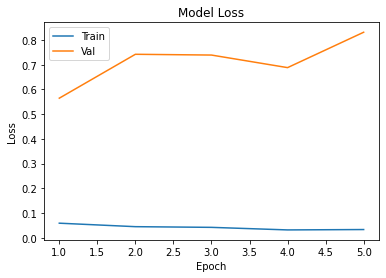

In [49]:
# Plot training and validation loss values
# Loss vs Val_Loss
plt.plot(range(1, 6), history.history["loss"])
plt.plot(range(1, 6), history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()